In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [258]:
tis = pd.read_csv('SheetPullData.csv', usecols = ['HH_ID', 'Roll_ID', 'Roll_Type', 'Time_since_last_pull', 'Sheets'])
tis.head()

,HH_ID,Roll_ID,Roll_Type,Time_since_last_pull,Sheets
0,A,1200,Small,4282.0,3.991088
1,A,1200,Small,2505.0,0.477180
2,A,1200,Small,2394.0,4.277735
3,A,1200,Small,14200.0,2.363388
4,A,1200,Small,828.0,0.314410


In [76]:
tis.describe()

,Roll_ID,Time_since_last_pull,Sheets
count,12785.000000,1.278500e+04,12785.000000
mean,10588.970747,6.551034e+03,4.802993
std,3361.010618,4.400347e+04,3.011595
min,-2557.000000,1.000000e+00,-11.188826
25%,10682.000000,1.100000e+01,2.726480
50%,11758.000000,4.660000e+02,4.654340
75%,12144.000000,7.757000e+03,6.749241
max,13655.000000,4.229427e+06,24.103288


<function matplotlib.pyplot.show(*args, **kw)>

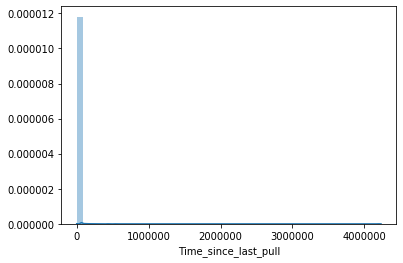

In [77]:
#Checking distribution of variable 'Time_since_last_pull'
sns.distplot(tis['Time_since_last_pull'])
plt.show

In [ ]:
#Since heavily skewed to right, We will use log transformation(all positive values)

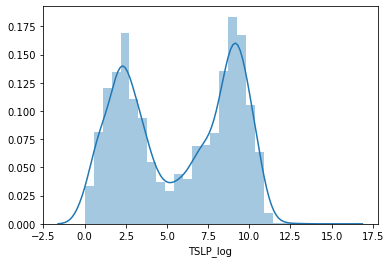

In [116]:
tis['TSLP_log'] = np.log(tis['Time_since_last_pull'])

sns.distplot(tis['TSLP_log'])

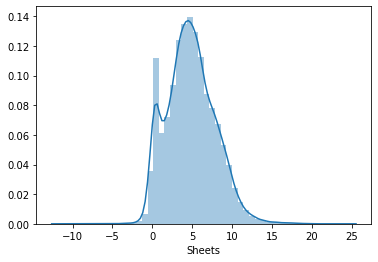

In [78]:
#Checking distribution of variable 'Sheets'
sns.distplot(tis['Sheets'])
plt.show()

In [327]:

mean = tis['Sheets'].mean()
std = tis['Sheets'].std()

tis['Sheets'] = tis['Sheets'].apply(lambda x: (x-mean)/std)

<function matplotlib.pyplot.show(*args, **kw)>

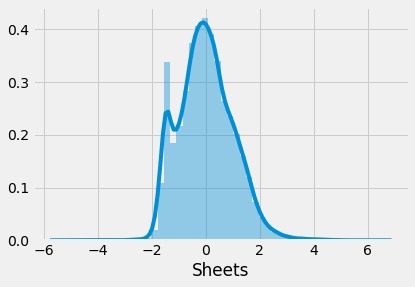

In [328]:
sns.distplot(tis['Sheets'])
plt.show

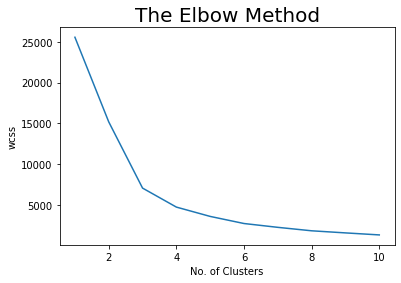

In [131]:
wcss = []
X = standardized_data[['Time_since_last_pull', 'Sheets']].values
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [308]:
#How many clusters
n_clusters = 4

#Categorical features
cat_features = ['Roll_ID', 'Roll_Type', 'HH_ID']


#Turning categorical variables into dummy columns
unstandardized_data = pd.get_dummies(tis, columns = cat_features, drop_first = True)

In [309]:

# exclude categorical variables from standardization.
cols_to_standardize = [
  column for column in tis.columns
    if column not in cat_features 
    
    
]
data_to_standardize = unstandardized_data[cols_to_standardize]

In [310]:
scaler = StandardScaler().fit(data_to_standardize)

In [311]:
# Standardize the data
standardized_data = unstandardized_data.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

In [312]:
standardized_data.describe()

,Time_since_last_pull,Sheets,Roll_ID_-1293,Roll_ID_-1286,Roll_ID_-1282,Roll_ID_-1154,Roll_ID_1200,Roll_ID_1202,Roll_ID_1203,Roll_ID_1204,...,Roll_ID_12553,Roll_ID_12640,Roll_ID_12730,Roll_ID_12835,Roll_ID_13015,Roll_ID_13655,Roll_Type_Small,HH_ID_B,HH_ID_C,HH_ID_D
count,1.278500e+04,1.278500e+04,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,...,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000,12785.000000
mean,1.737432e-16,-5.404272e-16,0.005788,0.006023,0.005006,0.004302,0.006179,0.005475,0.005553,0.005006,...,0.024638,0.030739,0.030974,0.032460,0.030817,0.020806,0.107704,0.201877,0.204771,0.496598
std,1.000039e+00,1.000039e+00,0.075862,0.077375,0.070578,0.065450,0.078367,0.073794,0.074317,0.070578,...,0.155026,0.172617,0.173253,0.177225,0.172829,0.142739,0.310019,0.401417,0.403550,0.500008
min,-1.488585e-01,-5.310290e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.486312e-01,-6.895329e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.382907e-01,-4.936208e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.740722e-02,6.462769e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.597063e+01,6.408913e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
#fitting model
km = KMeans(n_clusters = n_clusters).fit(standardized_data)

In [314]:
unstandardized_data['cluster'] = km.predict(standardized_data)
summary = unstandardized_data.groupby(['cluster']).mean()
summary['count'] = unstandardized_data['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

         Time_since_last_pull    Sheets  Roll_ID_-1293  Roll_ID_-1286  \
cluster                                                                 
3                4.464471e+03  1.901401       0.003948       0.007019   
1                9.035203e+03  4.902178       0.013023       0.010465   
0                4.637222e+03  8.067691       0.000000       0.000000   
2                3.176808e+06  0.398233       0.000000       0.000000   

         Roll_ID_-1282  Roll_ID_-1154  Roll_ID_1200  Roll_ID_1202  \
cluster                                                             
3             0.003729       0.002852      0.010309      0.007896   
1             0.010930       0.008837      0.007209      0.006047   
0             0.000000       0.001019      0.000255      0.002039   
2             0.000000       0.000000      0.000000      0.000000   

         Roll_ID_1203  Roll_ID_1204  ...  Roll_ID_12640  Roll_ID_12730  \
cluster                              ...                                

In [315]:
X = standardized_data[['Time_since_last_pull', 'Sheets']].values
predictions = km.fit_predict(X)

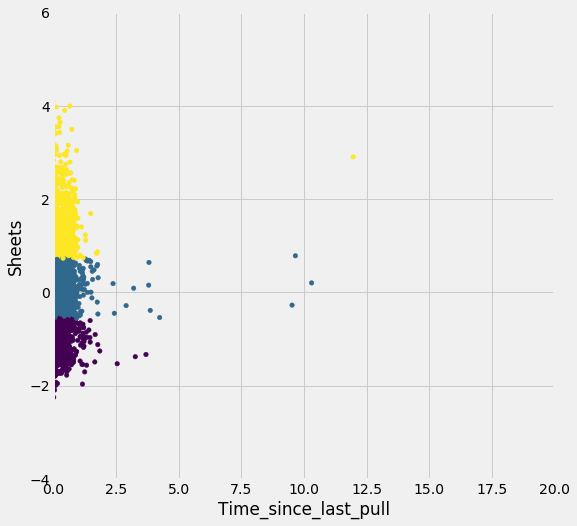

In [324]:
def draw_clusters(standardized_data, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 20)
    plt.ylim(-4, 6)
    ax.set_xlabel('Time_since_last_pull')
    ax.set_ylabel('Sheets')
    clustered = pd.concat([standardized_data.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['Time_since_last_pull'], clustered['Sheets'], c=clustered['group'], s=20)
# Plot
draw_clusters(standardized_data, predictions)

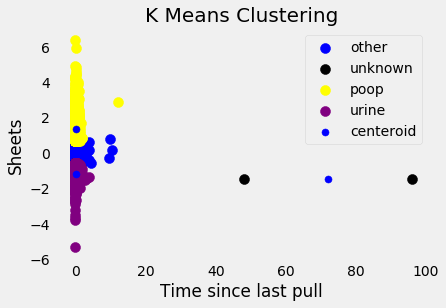

In [325]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'blue', label = 'other')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'black', label = 'unknown')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'yellow', label = 'poop')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'purple', label = 'urine')
#plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Time since last pull')
plt.ylabel('Sheets')
plt.legend()
plt.grid()
plt.show()

In [321]:
standardized_data.Time_since_last_pull.max()

95.97063114349176

In [227]:
######################################Starting again with merged datasets

In [287]:
demo = pd.read_csv('DemographicData.csv')
tis2=demo.merge(tis,how='right' )

In [288]:
tis2.head()

,HH_ID,HH_Size,Member1_Age,Member1_Gender,Member2_Gender,Roll_ID,Roll_Type,Time_since_last_pull,Sheets
0,A,2,30-34,Male,Female,1200,Small,4282.0,3.991088
1,A,2,30-34,Male,Female,1200,Small,2505.0,0.477180
2,A,2,30-34,Male,Female,1200,Small,2394.0,4.277735
3,A,2,30-34,Male,Female,1200,Small,14200.0,2.363388
4,A,2,30-34,Male,Female,1200,Small,828.0,0.314410


In [289]:
#feature engineering variable 'Member1_age' by averaging
tis2['min_age'] = tis2['Member1_Age'].apply(lambda x: int(x.split('-')[0]))
tis2['max_age'] = tis2['Member1_Age'].apply(lambda x: int(x.split('-')[1]))
tis2['Member1_average_age'] = (tis2.min_age + tis2.max_age) /2

In [276]:
tis2.head()

,HH_ID,HH_Size,Member1_Age,Member1_Gender,Member2_Gender,Roll_ID,Roll_Type,Time_since_last_pull,Sheets,min_age,max_age,Member1_average_age
0,A,2,30-34,Male,Female,1200,Small,4282.0,3.991088,30,34,32.0
1,A,2,30-34,Male,Female,1200,Small,2505.0,0.477180,30,34,32.0
2,A,2,30-34,Male,Female,1200,Small,2394.0,4.277735,30,34,32.0
3,A,2,30-34,Male,Female,1200,Small,14200.0,2.363388,30,34,32.0
4,A,2,30-34,Male,Female,1200,Small,828.0,0.314410,30,34,32.0


In [207]:
# Roll type 

tis2.groupby('Member1_average_age').mean()

,HH_Size,Roll_ID,Time_since_last_pull,Sheets,TSLP_log,min_age,max_age
Member1_average_age,,,,,,,
27.0,2.0,11205.468420,4390.428099,5.516486,4.970115,25.0,29.0
32.0,2.0,7169.599838,8648.768795,4.062042,6.135065,30.0,34.0
57.0,2.0,11336.021310,7851.660597,3.912689,6.683186,55.0,59.0
62.0,2.0,9973.035141,9517.373950,4.300497,6.336272,60.0,64.0


In [294]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(standardized_data)
#principalDf = pd.DataFrame(data = principalComponents
            # , columns = ['principal component 1', 'principal component 2'])
principalDf = pd.DataFrame(data = principalComponents)

In [295]:
from sklearn.metrics import silhouette_score
score = silhouette_score(standardized_data, labels = predictions)

In [296]:
score

0.09941121035273714

In [297]:
from sklearn.metrics import silhouette_score
score = silhouette_score(principalDf, labels = predictions)

In [298]:
score

0.10860928370326926